<a href="https://colab.research.google.com/github/55766sufyan/aritifical_intelligence_chest_xray_pneumonia_semester5/blob/main/notebooks/Phase_2_Data_Preprocessing_%26_Image_Generators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.1 Importing Libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


2.2: Define Paths & Image Size

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

# Base directory in Drive
base_dir = '/content/drive/MyDrive/datasets/chest_xray'

# Train / Validation / Test paths
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

# Target image size for CNN
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32  # Standard batch size



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for path, name in zip([train_dir, val_dir, test_dir], ['train','val','test']):
    print(f"{name} exists?", os.path.exists(path))


train exists? True
val exists? True
test exists? True


2.3 : Create ImageDataGenerators

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#  Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to 0–1
    rotation_range=15,     # Random rotation
    width_shift_range=0.1, # Random horizontal shift
    height_shift_range=0.1,# Random vertical shift
    shear_range=0.1,       # Shear transformation
    zoom_range=0.1,        # Random zoom
    horizontal_flip=True,  # Flip horizontally
    fill_mode='nearest'    # Fill empty pixels after transformation
)

#  Validation generator (only rescale)
val_datagen = ImageDataGenerator(rescale=1./255)

#  Test generator (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)


2.4 : Flow From Directory

In [ ]:
# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'   # Binary classification: NORMAL=0, PNEUMONIA=1
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Important for evaluation
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


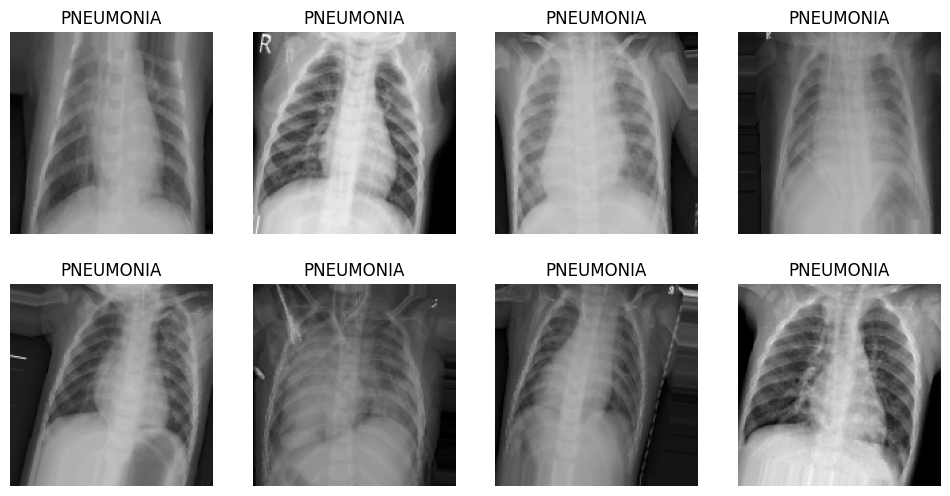

In [11]:
import matplotlib.pyplot as plt

# Get one batch of training images
images, labels = next(train_generator)

plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.title('PNEUMONIA' if labels[i]==1 else 'NORMAL')
    plt.axis('off')
plt.show()
